### Exercise 1


In [4]:
import pandas as pd
#1. Read the file IMDB.csv into a pandas dataframe
imdb_df = pd.read_csv('IMDb movies.csv')
imdb_df['genre']

0          Biography, Crime, Drama
1                            Drama
2                   Drama, History
3        Adventure, Drama, Fantasy
4                 Biography, Drama
                   ...            
81268             Horror, Thriller
81269                        Drama
81270                        Drama
81271                        Drama
81272                Drama, Family
Name: genre, Length: 81273, dtype: object

In [5]:
#2. Select only rows with USA $ sign
print(imdb_df['budget'])
dollar_rows = imdb_df[~imdb_df['budget'].isna()]
dollar_rows = dollar_rows[dollar_rows['budget'].str.contains("\$")]
dollar_rows.head()


0              $ 2250
1                 NaN
2             $ 45000
3                 NaN
4                 NaN
             ...     
81268             NaN
81269     INR 4000000
81270    INR 10000000
81271             NaN
81272             NaN
Name: budget, Length: 81273, dtype: object


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN,24.0,3.0
8,tt0002461,Richard III,Richard III,1912,1912-10-15,Drama,55,"France, USA",English,"André Calmettes, James Keane",...,"Robert Gemp, Frederick Warde, Albert Gardner, ...",Richard of Gloucester uses manipulation and mu...,5.5,211,$ 30000,NaN,NaN,NaN,7.0,1.0
17,tt0003471,Traffic in Souls,Traffic in Souls,1913,1913-11-24,"Crime, Drama",88,USA,English,George Loane Tucker,...,"Jane Gail, Ethel Grandin, William H. Turner, M...","A woman, with the aid of her police officer sw...",6.1,527,$ 5700,NaN,NaN,NaN,13.0,10.0
22,tt0003740,Cabiria,Cabiria,1914,1914,"Adventure, Drama, History",148,Italy,Italian,Giovanni Pastrone,...,"Carolina Catena, Lidia Quaranta, Gina Marangon...",Three centuries before Christus. Young Cabiria...,7.1,2838,$ 210000,NaN,NaN,NaN,29.0,26.0


In [6]:
#3. Remove the $ sign
dollar_rows['budget'] = dollar_rows['budget'].str.replace("$", "")

C:\Users\Thu\AppData\Local\Temp\ipykernel_30848\3617916820.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dollar_rows['budget'] = dollar_rows['budget'].str.replace("$", "")


In [7]:
#4. Make the type numerical
dollar_rows['budget'] = dollar_rows['budget'].astype('int')


In [8]:
#5. Make a (bar) plot where for each year you could see the total budget

plot_data = dollar_rows[['year', 'budget']]
plot_data = dollar_rows.groupby('year')['budget'].sum()
plot_data.head()

year
1906      2250.0
1912     75000.0
1913      5700.0
1914    395522.0
1915    227452.0
Name: budget, dtype: float64

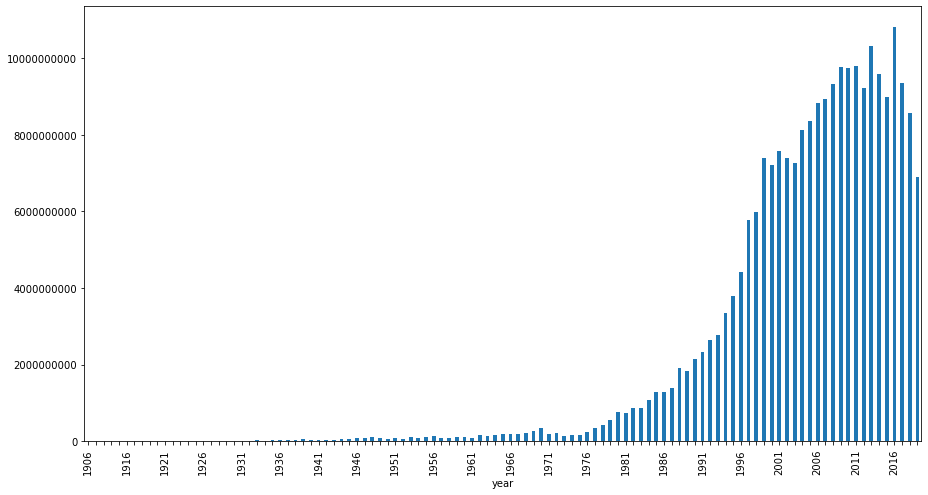

In [9]:
ax = plot_data.plot(kind='bar', figsize=(15,8) )
ax.set_xticklabels([t if not i%5 else "" for i,t in enumerate(ax.get_xticklabels())])
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)


In [10]:
# 6. Split ‘genre’ in different columns
imdb_df[['genre1', 'genre2', 'genre3']] = imdb_df['genre'].str.split(',', expand=True)

In [11]:
imdb_df.drop('genre', axis=1)

,imdb_title_id,title,original_title,year,date_published,duration,country,language,director,writer,...,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,genre1,genre2,genre3
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,70,Australia,NaN,Charles Tait,Charles Tait,...,537,$ 2250,NaN,NaN,NaN,7.0,7.0,Biography,Crime,Drama
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",...,171,NaN,NaN,NaN,NaN,4.0,2.0,Drama,None,None
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,100,USA,English,Charles L. Gaskill,Victorien Sardou,...,420,$ 45000,NaN,NaN,NaN,24.0,3.0,Drama,History,None
3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,...,2019,NaN,NaN,NaN,NaN,28.0,14.0,Adventure,Drama,Fantasy
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,60,USA,English,Sidney Olcott,Gene Gauntier,...,438,NaN,NaN,NaN,NaN,12.0,5.0,Biography,Drama,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81268,tt9903716,Jessie,Jessie,2019,2019-03-15,106,India,Telugu,Aswani Kumar V.,Aswani Kumar V.,...,219,NaN,NaN,NaN,NaN,21.0,NaN,Horror,Thriller,None
81269,tt9905412,Ottam,Ottam,2019,2019-03-08,120,India,Malayalam,Zam,Rajesh k Narayan,...,510,INR 4000000,NaN,$ 4791,NaN,NaN,NaN,Drama,None,None
81270,tt9905462,Pengalila,Pengalila,2019,2019-03-08,111,India,Malayalam,T.V. Chandran,T.V. Chandran,...,604,INR 10000000,NaN,NaN,NaN,NaN,NaN,Drama,None,None
81271,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,130,India,Malayalam,Vineesh Aaradya,"Vineesh Aaradya, Vineesh Aaradya",...,369,NaN,NaN,NaN,NaN,NaN,NaN,Drama,None,None


In [12]:
# 7. Add a column ‘numberOfActors’ containing the number of actors mentioned in the column ‘actors’
actors = imdb_df['actors'].str.split(',', expand=False)

In [13]:
imdb_df['numberOfActors'] = imdb_df['actors'].str.split(',', expand=False).str.len()

In [14]:
imdb_df[['actors', 'numberOfActors']]

,actors,numberOfActors
0,"Elizabeth Tait, John Tait, Norman Campbell, Be...",13.0
1,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",6.0
2,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",13.0
3,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",7.0
4,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...",9.0
...,...,...
81268,"Sritha Chandana, Pavani Gangireddy, Abhinav Go...",12.0
81269,"Nandu Anand, Roshan Ullas, Manikandan R. Achar...",11.0
81270,"Lal, Akshara Kishor, Iniya, Narain, Renji Pani...",7.0
81271,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",4.0


In [15]:
# Add a column ‘mainActor’ containing only the first mentioned actor in the column ‘actors’
imdb_df['mainActor'] = imdb_df['actors'].str.split(',', expand=True)[0]

In [16]:
imdb_df['mainActor']

0            Elizabeth Tait
1              Asta Nielsen
2             Helen Gardner
3            Salvatore Papa
4        R. Henderson Bland
                ...        
81268       Sritha Chandana
81269           Nandu Anand
81270                   Lal
81271        Anoop Chandran
81272     Ahmet Faik Akinci
Name: mainActor, Length: 81273, dtype: object

In [17]:
imdb_df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,genre1,genre2,genre3,numberOfActors,mainActor
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,NaN,NaN,NaN,7.0,7.0,Biography,Crime,Drama,13.0,Elizabeth Tait
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,NaN,NaN,NaN,4.0,2.0,Drama,None,None,6.0,Asta Nielsen
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,NaN,NaN,NaN,24.0,3.0,Drama,History,None,13.0,Helen Gardner
3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,NaN,NaN,NaN,28.0,14.0,Adventure,Drama,Fantasy,7.0,Salvatore Papa
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,NaN,NaN,NaN,12.0,5.0,Biography,Drama,None,9.0,R. Henderson Bland


### Exercise 2

In [61]:
# 1. Read the file BL-Flickr-Images-Book.csv into a pandas dataframe
books_df = pd.read_csv('BL-Flickr-Images-Book.csv')


In [62]:
# 2. Look at the 5 first rows
books_df[0:5]

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/tags/sysnum000000206,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,"All for Greed. [A novel. The dedication signed: A. A. A., i.e. Marie Pauline Rose, Baroness Blaze de Bury.]","A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/tags/sysnum000000216,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869,"Bradbury, Evans & Co.","Love the Avenger. By the author of “All for Greed.” [The dedication signed: A. A. A., i.e. Marie Pauline Rose, Baroness Blaze de Bury.]","A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/tags/sysnum000000218,British Library HMNTS 12625.dd.1.
3,472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the close of the twelfth century. By the author of “Proposals for Christian Union” (E. S. A. [i.e. Ernest Appleyard])","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/tags/sysnum000000472,British Library HMNTS 10369.bbb.15.
4,480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it. By E. S. A. [i.e. Letitia Willgoss Stone.] Edited by ... J. H. Broome.]","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/tags/sysnum000000480,British Library HMNTS 9007.d.28.


In [63]:
# 3. Look at the number of columns
len(books_df.columns)

15

In [64]:
# 4. We want to keep only the columns
# ['Identifier', 'Place of Publication', 'Date of Publication',
# 'Publisher', 'Title', 'Author', 'Flickr URL']
books_df = books_df[['Identifier', 'Place of Publication', 'Date of Publication', 'Publisher', 'Title', 'Author', 'Flickr URL']]

In [65]:
books_df.head()

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/tags/sysnum000000206
1,216,London; Virtue & Yorston,1868,Virtue & Co.,"All for Greed. [A novel. The dedication signed: A. A. A., i.e. Marie Pauline Rose, Baroness Blaze de Bury.]","A., A. A.",http://www.flickr.com/photos/britishlibrary/tags/sysnum000000216
2,218,London,1869,"Bradbury, Evans & Co.","Love the Avenger. By the author of “All for Greed.” [The dedication signed: A. A. A., i.e. Marie Pauline Rose, Baroness Blaze de Bury.]","A., A. A.",http://www.flickr.com/photos/britishlibrary/tags/sysnum000000218
3,472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the close of the twelfth century. By the author of “Proposals for Christian Union” (E. S. A. [i.e. Ernest Appleyard])","A., E. S.",http://www.flickr.com/photos/britishlibrary/tags/sysnum000000472
4,480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it. By E. S. A. [i.e. Letitia Willgoss Stone.] Edited by ... J. H. Broome.]","A., E. S.",http://www.flickr.com/photos/britishlibrary/tags/sysnum000000480


In [66]:
# 5. Look at the first 25 rows of 'Date of Publication'. Use a function to clean up 
import math


unwanted_characters = ['[', ',', '-', ']','.']
def clean_dates(dop):
    dop = str(dop)
    for i in unwanted_characters:
        dop = dop.replace(i, ' ')
    dop = dop.split(' ')[0]
    return dop

books_df['Date of Publication'] = books_df['Date of Publication'].apply(clean_dates)
books_df.head()


,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,206,London,1879,S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/tags/sysnum000000206
1,216,London; Virtue & Yorston,1868,Virtue & Co.,"All for Greed. [A novel. The dedication signed: A. A. A., i.e. Marie Pauline Rose, Baroness Blaze de Bury.]","A., A. A.",http://www.flickr.com/photos/britishlibrary/tags/sysnum000000216
2,218,London,1869,"Bradbury, Evans & Co.","Love the Avenger. By the author of “All for Greed.” [The dedication signed: A. A. A., i.e. Marie Pauline Rose, Baroness Blaze de Bury.]","A., A. A.",http://www.flickr.com/photos/britishlibrary/tags/sysnum000000218
3,472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the close of the twelfth century. By the author of “Proposals for Christian Union” (E. S. A. [i.e. Ernest Appleyard])","A., E. S.",http://www.flickr.com/photos/britishlibrary/tags/sysnum000000472
4,480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it. By E. S. A. [i.e. Letitia Willgoss Stone.] Edited by ... J. H. Broome.]","A., E. S.",http://www.flickr.com/photos/britishlibrary/tags/sysnum000000480


In [67]:
pd.set_option('display.max_colwidth', None)


In [68]:
#6. Use a function to clean up the column ‘Title’
unwanted_characters_title = ['[', '-', ']','.', ';']

def clean_title(title):
    if title == 'nan':
        return 'NaN'
    for i in unwanted_characters_title:
        title = title.replace(i, '?')
    title = title.split('?')[0]
    return title
    
books_df['Title'] = books_df['Title'].apply(clean_title)


In [70]:
books_df.head()

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,206,London,1879,S. Tinsley & Co.,Walter Forbes,A. A.,http://www.flickr.com/photos/britishlibrary/tags/sysnum000000206
1,216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed,"A., A. A.",http://www.flickr.com/photos/britishlibrary/tags/sysnum000000216
2,218,London,1869,"Bradbury, Evans & Co.",Love the Avenger,"A., A. A.",http://www.flickr.com/photos/britishlibrary/tags/sysnum000000218
3,472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the close of the twelfth century","A., E. S.",http://www.flickr.com/photos/britishlibrary/tags/sysnum000000472
4,480,London,1857,Wertheim & Macintosh,,"A., E. S.",http://www.flickr.com/photos/britishlibrary/tags/sysnum000000480
